In [ ]:
import cv2
import numpy as np
from skimage import io, img_as_float
from google.colab.patches import cv2_imshow

def alpha1(image):
    # Calculate alpha based on image variance and resolution
    height, width = image.shape
    resolution = min(height, width)
    variance = np.var(image)
    alpha = 0.1 * (variance / resolution)
    return alpha

def calculate_spatial_resolutions(image, num_points_x, num_points_y):
    height, width = image.shape
    delta_x = width / num_points_x
    delta_y = height / num_points_y
    return delta_x, delta_y

def num_points(image):
    height, width = image.shape
    num_points_x = width
    num_points_y = height
    return num_points_x, num_points_y

def delta_t1(alpha, delta_x, delta_y):
    return min(delta_x ** 2 / (4 * alpha), delta_y ** 2 / (4 * alpha))

def num_time_steps(delta_x, delta_y, alpha):
    delta_t = delta_x ** 2 * delta_y ** 2 / (2 * alpha * (delta_x ** 2 + delta_y ** 2))
    return int(delta_t)

def update_temperature(u, alpha, delta_t, delta_x, delta_y):
    rows, cols = u.shape
    u_new = np.copy(u)
    dx2 = delta_x ** 2
    #dy2 = delta_y ** 2
    dy2 =  delta_x ** 2
    dt_dx2 = alpha * delta_t / dx2
    dt_dy2 = alpha * delta_t / dy2

    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            if u[i, j] > np.mean(u[max(0, i-1):min(rows, i+2), max(0, j-1):min(cols, j+2)]):
                continue  # Skip updating this pixel
            u_xx = (u[i + 1, j] - 2 * u[i, j] + u[i - 1, j]) / dx2
            u_yy = (u[i, j + 1] - 2 * u[i, j] + u[i, j - 1]) / dy2
            u_new[i, j] = u[i, j] + alpha * delta_t * (u_xx + u_yy)
    return u_new

def main(image_path):
    image = io.imread(image_path, as_gray=True)
    image = img_as_float(image)  # Normalize image to [0, 1]

    alpha = alpha1(image)
    num_points_x, num_points_y = num_points(image)
    delta_x, delta_y = calculate_spatial_resolutions(image, num_points_x, num_points_y)
    delta_t = delta_t1(alpha, delta_x, delta_y)
    num_time_steps_count = num_time_steps(delta_x, delta_y, alpha)

    u_initial = image.copy()
    u = u_initial.copy()

    for i in range(num_time_steps_count):
        u = update_temperature(u, alpha, delta_t, delta_x, delta_y)

    cv2_imshow((u * 255).astype(np.uint8))  # Convert back to [0, 255] for display
    cv2.waitKey(0)
    cv2.destroyAllWindows()

if __name__ == "__main__":
    image_path = '/content/drive/MyDrive/IMAGEprossing/Input-test-images-a-Cameraman-grayscale-b-grayscale-Lena-and-c-color-Lena-All.png'
    main(image_path)


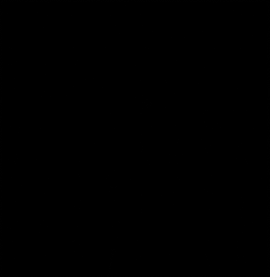

In [ ]:
import cv2
import numpy as np
from skimage import io
from google.colab.patches import cv2_imshow

def alpha1(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise FileNotFoundError(f"Image at {image_path} not found.")
    height, width = image.shape
    resolution = min(height, width)
    variance = np.var(image)
    alpha = 0.1 * (variance / resolution)
    return alpha

def calculate_spatial_resolutions(image, num_points_x, num_points_y):
    height, width = image.shape
    delta_x = width / num_points_x
    delta_y = height / num_points_y
    return delta_x, delta_y

def num_points(image):
    height, width = image.shape
    num_points_x = width
    num_points_y = height
    return num_points_x, num_points_y

def delta_t1(alpha, delta_x, delta_y):
    return min(delta_x**2 / (4 * alpha), delta_y**2 / (4 * alpha))

def num_time_steps(delta_x, delta_y, alpha):
    delta_t = delta_x**2 * delta_y**2 / (2 * alpha * (delta_x**2 + delta_y**2))
    return int(delta_t)

def update_temperature(u, alpha, delta_t, delta_x, delta_y):
    rows, cols = u.shape
    u_new = np.zeros_like(u)
    dx2 = delta_x ** 2
    dy2 = delta_y ** 2
    dt_dx2 = alpha * delta_t / dx2
    dt_dy2 = alpha * delta_t / dy2
    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            #if u[i, j] > np.mean(u[max(0, i-1):min(rows, i+2), max(0, j-1):min(cols, j+2)]):
               # continue  # Skip updating this pixel
            u_xx = (u[i + 1, j] - 2 * u[i, j] + u[i - 1, j]) / dx2
            u_yy = (u[i, j + 1] - 2 * u[i, j] + u[i, j - 1]) / dy2
            u_new[i, j] = u[i, j] + alpha * delta_t * (u_xx + u_yy)
    return u_new

def main(image_path):
    image = io.imread(image_path, as_gray=True)
    image = np.array(image)

    alpha = alpha1(image_path)
    num_points_x, num_points_y = num_points(image)
    delta_x, delta_y = calculate_spatial_resolutions(image, num_points_x, num_points_y)
    delta_t = delta_t1(alpha, delta_x, delta_y)
    num_time_steps_count = num_time_steps(delta_x, delta_y, alpha)

    u_initial = image.copy()
    u = u_initial.copy()

    for i in range(num_time_steps_count):
        u = update_temperature(u, alpha, delta_t, delta_x, delta_y)

    cv2_imshow(u)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

if __name__ == "__main__":
    image_path = "/content/drive/MyDrive/IMAGEprossing/1_fuuHaginFIbOL8MoZC-WGw.jpg"
    main(image_path)


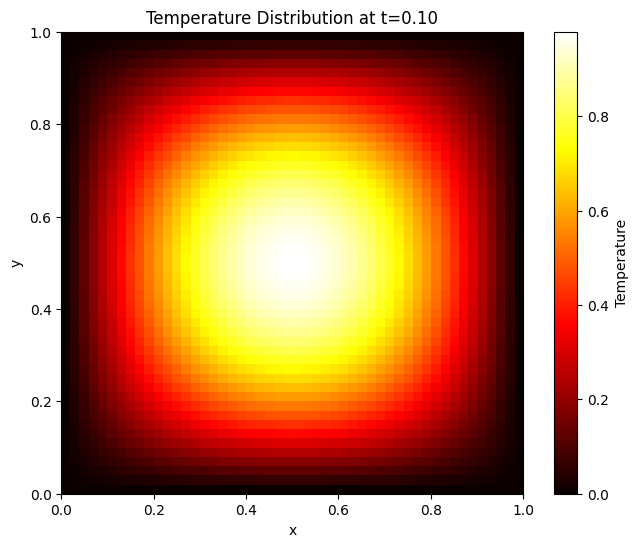

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def initialize_temperature(Nx, Ny, dx, dy):
    """Initialize the temperature grid with the initial condition sin(pi*x) sin(pi*y)"""
    x = np.linspace(0, 1, Nx)
    y = np.linspace(0, 1, Ny)
    X, Y = np.meshgrid(x, y)
    u = np.sin(np.pi * X) * np.sin(np.pi * Y)
    return u

def update_temperature(u, alpha, dt, dx, dy):
    """Update the temperature grid using finite difference method"""
    Nx, Ny = u.shape
    u_new = np.copy(u)

    for i in range(1, Nx-1):
        for j in range(1, Ny-1):
            u_xx = (u[i+1, j] - 2*u[i, j] + u[i-1, j]) / dx**2
            u_yy = (u[i, j+1] - 2*u[i, j] + u[i, j-1]) / dy**2
            u_new[i, j] = u[i, j] + alpha * dt * (u_xx + u_yy)

    return u_new

def plot_temperature(u, t):
    """Plot the temperature distribution"""
    plt.figure(figsize=(8, 6))
    plt.imshow(u, cmap='hot', origin='lower', extent=[0, 1, 0, 1])
    plt.colorbar(label='Temperature')
    plt.title(f'Temperature Distribution at t={t:.2f}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

# Parameters
Nx, Ny = 50, 50  # Grid points
Lx, Ly = 1.0, 1.0  # Length of the domain
dx, dy = Lx / (Nx-1), Ly / (Ny-1)  # Grid spacing
alpha = 0.01  # Thermal diffusivity
dt = 0.0001  # Time step

# Initialize temperature distribution
u = initialize_temperature(Nx, Ny, dx, dy)

# Time to reach
target_time = 0.1
num_time_steps = int(target_time / dt)

# Run the simulation
for n in range(num_time_steps):
    u = update_temperature(u, alpha, dt, dx, dy)

# Plot the result at the specific time level
plot_temperature(u, target_time)


[[0.         0.02040816 0.04081633 ... 0.95918367 0.97959184 1.        ]
 [0.         0.02040816 0.04081633 ... 0.95918367 0.97959184 1.        ]
 [0.         0.02040816 0.04081633 ... 0.95918367 0.97959184 1.        ]
 ...
 [0.         0.02040816 0.04081633 ... 0.95918367 0.97959184 1.        ]
 [0.         0.02040816 0.04081633 ... 0.95918367 0.97959184 1.        ]
 [0.         0.02040816 0.04081633 ... 0.95918367 0.97959184 1.        ]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.02040816 0.02040816 0.02040816 ... 0.02040816 0.02040816 0.02040816]
 [0.04081633 0.04081633 0.04081633 ... 0.04081633 0.04081633 0.04081633]
 ...
 [0.95918367 0.95918367 0.95918367 ... 0.95918367 0.95918367 0.95918367]
 [0.97959184 0.97959184 0.97959184 ... 0.97959184 0.97959184 0.97959184]
 [1.         1.         1.         ... 1.         1.         1.        ]]


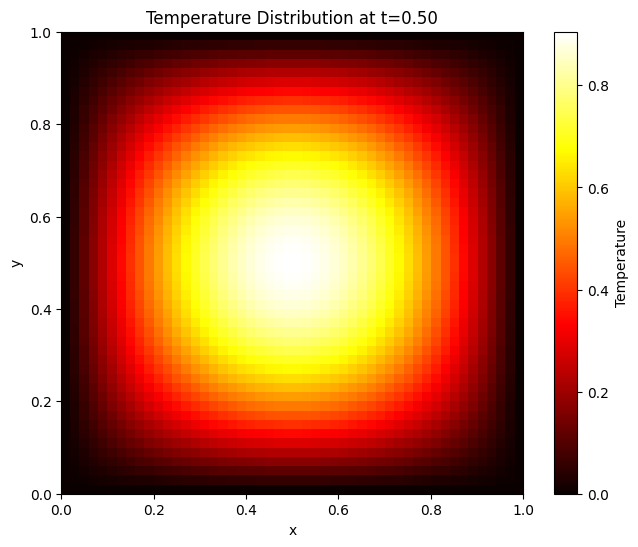

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def initialize_temperature(Nx, Ny, dx, dy):


    #Nx = 50 means there are 50 grid points along the x-axis.
    #Ny = 50 means there are 50 grid points along the y-axis.
    #so,it's make 50x50 matrix
    #Lx = 1.0 indicates the length of the domain in the x-direction is 1 unit.
    #Ly = 1.0 indicates the length of the domain in the y-direction is 1 unit.
    #The grid points divide the domain into intervals. For Nx grid points, there are Nx - 1 intervals in the x-direction.
    #Similarly, for Ny grid points, there are Ny - 1 intervals in the y-direction.
    #x = np.linspace(0, 1, Nx):
          #Creates an array of Nx points from 0 to 1.
   #y = np.linspace(0, 1, Ny):
       #Creates an array of Ny points from 0 to 1.
   #X, Y = np.meshgrid(x, y):
       #Generates a 2D grid where X contains x-coordinates repeated along the y-axis and Y contains y-coordinates repeated along the x-axis.


    x = np.linspace(0, 1, Nx)  #1d array -[0,0.1,........,1]
    y = np.linspace(0, 1, Ny)  ##1d array -[0,0.1,........,1]
    X, Y = np.meshgrid(x, y)
    print(X)
    print(Y)
    u = np.sin(np.pi * X) * np.sin(np.pi * Y)
    return u

def update_temperature(u, alpha, dt, dx, dy):

    Nx, Ny = u.shape     #Nx, Ny = u.shape gets the dimensions of the temperature array u.
    #print(Nx)
    #print(Ny)
    #print(u)
    u_new = np.copy(u)    #u_new is a copy of u to store the updated temperature values.

    for i in range(1, Nx-1):
        for j in range(1, Ny-1):
            u_xx = (u[i+1, j] - 2*u[i, j] + u[i-1, j]) / dx**2
            u_yy = (u[i, j+1] - 2*u[i, j] + u[i, j-1]) / dy**2
            u_new[i, j] = u[i, j] + alpha * dt * (u_xx + u_yy)

    return u_new

def plot_temperature(u, t):

    plt.figure(figsize=(8, 6))    # Creates a new figure with a specified size (width: 8 inches, height: 6 inches).
    plt.imshow(u, cmap='hot', origin='lower', extent=[0, 1, 0, 1])       #cmap stands for "color map". 'hot' is one of Matplotlib's predefined colormaps, which transitions from black to red to yellow to white. It's commonly used to represent temperature, as it provides a clear gradient that mimics the color of a hot object.
                                                                      #extent specifies the boundaries of the plot in data coordinates. [0, 1, 0, 1] means the x-axis ranges from 0 to 1 and the y-axis ranges from 0 to 1. This matches the spatial domain of the temperature distribution.
    plt.colorbar(label='Temperature')   #This function adds a color bar to the plot, which is a vertical bar that shows the mapping between the data values and their corresponding colors in the colormap.
                                        #This sets the label for the color bar, which helps to identify what the colors represent. In this case, it labels the color bar as "Temperature"
    plt.title(f'Temperature Distribution at t={t:.2f}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

# Parameters
Nx, Ny = 50, 50  # Grid points
Lx, Ly = 1.0, 1.0  # Length of the domain
dx, dy = Lx / (Nx-1), Ly / (Ny-1)  # dx and dy are calculated as the spacing between grid points.
alpha = 0.01  # Thermal diffusivity
dt = 0.0001  # Time step

# Initialize temperature distribution
u = initialize_temperature(Nx, Ny, dx, dy)

# Time to reach
target_time = 0.5
num_time_steps = int(target_time / dt)

# Run the simulation
for n in range(num_time_steps):
    u = update_temperature(u, alpha, dt, dx, dy)

# Plot the result at the specific time level
plot_temperature(u, target_time)


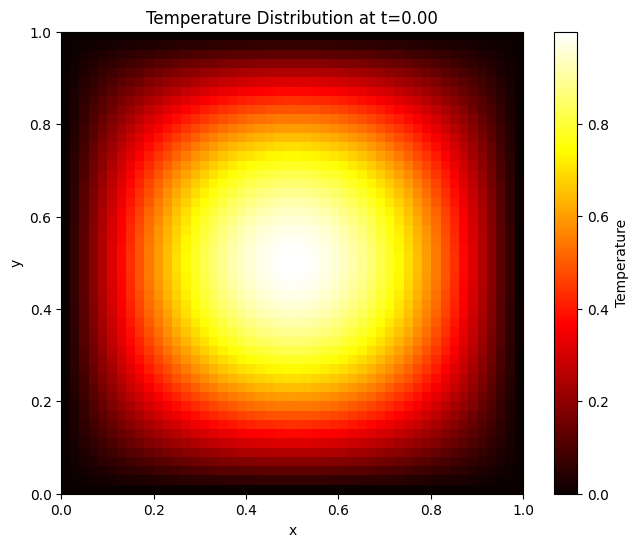

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def initialize_temperature(Nx, Ny, dx, dy):
    """Initialize the temperature grid with the initial condition sin(pi*x) sin(pi*y)"""
    x = np.linspace(0, 1, Nx)
    y = np.linspace(0, 1, Ny)
    X, Y = np.meshgrid(x, y)
    u = np.sin(np.pi * X) * np.sin(np.pi * Y)
    return u

def update_temperature(u, alpha, dt, dx, dy):
    """Update the temperature grid using finite difference method"""
    Nx, Ny = u.shape
    u_new = np.copy(u)

    for i in range(1, Nx-1):
        for j in range(1, Ny-1):
            u_xx = (u[i+1, j] - 2*u[i, j] + u[i-1, j]) / dx**2
            u_yy = (u[i, j+1] - 2*u[i, j] + u[i, j-1]) / dy**2
            u_new[i, j] = u[i, j] + alpha * dt * (u_xx + u_yy)

    return u_new

def plot_temperature(u, t):
    """Plot the temperature distribution"""
    plt.figure(figsize=(8, 6))
    plt.imshow(u, cmap='hot', origin='lower', extent=[0, 1, 0, 1])
    plt.colorbar(label='Temperature')
    plt.title(f'Temperature Distribution at t={t:.2f}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

# Parameters
Nx, Ny = 50, 50  # Grid points
Lx, Ly = 1.0, 1.0  # Length of the domain
dx, dy = Lx / (Nx-1), Ly / (Ny-1)  # Grid spacing
alpha = 0.01  # Thermal diffusivity
dt = 0.0001  # Time step

# Initialize temperature distribution
u = initialize_temperature(Nx, Ny, dx, dy)

# Time to reach
target_time = 0.001
num_time_steps = int(target_time / dt)

# Run the simulation
for n in range(num_time_steps):
    u = update_temperature(u, alpha, dt, dx, dy)

# Plot the result at the specific time level
plot_temperature(u, target_time)


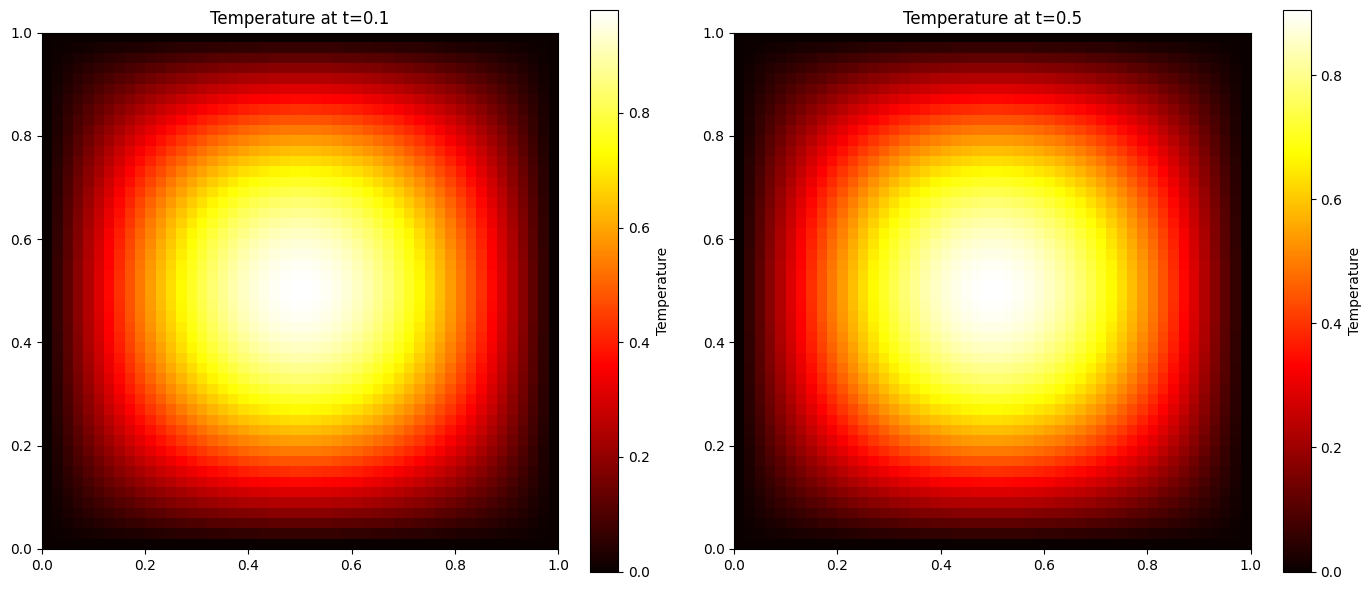

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
Nx, Ny = 50, 50
Lx, Ly = 1.0, 1.0
dx = Lx / (Nx - 1)
dy = Ly / (Ny - 1)
dx2 = dx * dx
dy2 = dy * dy
alpha = 0.01
dt = 0.001
nt = 1000  # Number of time steps

def initialize_temperature(Nx, Ny, dx, dy):
    x = np.linspace(0, 1, Nx)
    y = np.linspace(0, 1, Ny)
    X, Y = np.meshgrid(x, y)
    u = np.sin(np.pi * X) * np.sin(np.pi * Y)
    return u

def update_temperature(u, alpha, dx2, dy2, dt):
    rows, cols = u.shape
    u_new = np.copy(u)

    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            u_xx = (u[i + 1, j] - 2 * u[i, j] + u[i - 1, j]) / dx2
            u_yy = (u[i, j + 1] - 2 * u[i, j] + u[i, j - 1]) / dy2
            u_new[i, j] = u[i, j] + alpha * dt * (u_xx + u_yy)
    return u_new

# Initialize temperature
u = initialize_temperature(Nx, Ny, dx, dy)

# Time loop
temperature_over_time = [u.copy()]
for t in range(1, nt):
    u = update_temperature(u, alpha, dx2, dy2, dt)
    if t == int(0.1 / dt) or t == int(0.5 / dt):
        temperature_over_time.append(u.copy())

# Plotting
def plot_temperature_difference(u1, u2, title):
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(u1, cmap='hot', origin='lower', extent=[0, 1, 0, 1])
    plt.colorbar(label='Temperature')
    plt.title(f'Temperature at t={title[0]}')

    plt.subplot(1, 2, 2)
    plt.imshow(u2, cmap='hot', origin='lower', extent=[0, 1, 0, 1])
    plt.colorbar(label='Temperature')
    plt.title(f'Temperature at t={title[1]}')

    plt.tight_layout()
    plt.show()

# Plot temperature at t=0.1 and t=0.5
plot_temperature_difference(temperature_over_time[1], temperature_over_time[2], (0.1, 0.5))


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create a simple grid with values increasing linearly from 0 to 1
data = np.linspace(0, 1, 100).reshape((10, 10))

plt.figure(figsize=(10, 4))

# Default origin (upper)
plt.subplot(1, 2, 1)
plt.imshow(data, cmap='viridis')
plt.colorbar()
plt.title('Default Origin (Upper)')
plt.xlabel('x')
plt.ylabel('y')

# Lower origin
plt.subplot(1, 2, 2)
plt.imshow(data, cmap='viridis', origin='lower')
plt.colorbar()
plt.title('Lower Origin')
plt.xlabel('x')
plt.ylabel('y')

plt.tight_layout()
plt.show()


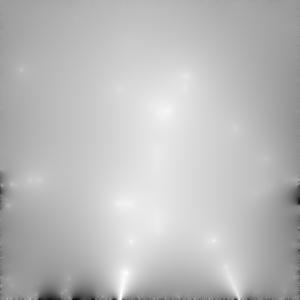

In [ ]:
import cv2
import numpy as np
from skimage import io, img_as_float
from google.colab.patches import cv2_imshow

def alpha1(image):
    # Calculate alpha based on image variance and resolution
    height, width = image.shape
    resolution = min(height, width)
    variance = np.var(image)
    alpha = 0.1 * (variance / resolution)
    return alpha

def calculate_spatial_resolutions(image, num_points_x, num_points_y):
    height, width = image.shape
    delta_x = width / num_points_x
    delta_y = height / num_points_y
    return delta_x, delta_y

def num_points(image):
    height, width = image.shape
    num_points_x = width
    num_points_y = height
    return num_points_x, num_points_y

def delta_t1(alpha, delta_x, delta_y):
    return min(delta_x ** 2 / (4 * alpha), delta_y ** 2 / (4 * alpha))

def num_time_steps(delta_x, delta_y, alpha):
    delta_t = delta_x ** 2 * delta_y ** 2 / (2 * alpha * (delta_x ** 2 + delta_y ** 2))
    return int(delta_t)

def update_temperature(u, alpha, delta_t, delta_x, delta_y):
    rows, cols = u.shape
    u_new = np.copy(u)
    dx2 = delta_x ** 2
    dy2 = delta_y ** 2

    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            if u[i, j] > np.mean(u[max(0, i-1):min(rows, i+2), max(0, j-1):min(cols, j+2)]):
                continue  # Skip updating this pixel
            u_xx = (u[i + 1, j] - 2 * u[i, j] + u[i - 1, j]) / dx2
            u_yy = (u[i, j + 1] - 2 * u[i, j] + u[i, j - 1]) / dy2
            u_new[i, j] = u[i, j] + alpha * delta_t * (u_xx + u_yy)
    return u_new

def main(image_path):
    image = io.imread(image_path, as_gray=True)
    image = img_as_float(image)  # Normalize image to [0, 1]

    # Resize image if too large
    max_dim = 300
    if max(image.shape) > max_dim:
        scale = max_dim / max(image.shape)
        image = cv2.resize(image, (int(image.shape[1] * scale), int(image.shape[0] * scale)))

    alpha = alpha1(image)
    num_points_x, num_points_y = num_points(image)
    delta_x, delta_y = calculate_spatial_resolutions(image, num_points_x, num_points_y)
    delta_t = delta_t1(alpha, delta_x, delta_y)
    num_time_steps_count = num_time_steps(delta_x, delta_y, alpha)

    u_initial = image.copy()
    u = u_initial.copy()

    for i in range(num_time_steps_count):
        u = update_temperature(u, alpha, delta_t, delta_x, delta_y)

    cv2_imshow((u * 255).astype(np.uint8))  # Convert back to [0, 255] for display
    cv2.waitKey(0)
    cv2.destroyAllWindows()

if __name__ == "__main__":
    image_path = '/content/drive/MyDrive/IMAGEprossing/Input-test-images-a-Cameraman-grayscale-b-grayscale-Lena-and-c-color-Lena-All.png'
    main(image_path)
